# Streamflow quality control (filtering)

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is part of the EStreams publication and was used to filter the original collated streamflow time-series according to their original flags (when available from providers). The flags are translated as 2=no-flag from providers, 1=validated data, 0=suspect data, NaN=missing value. This approach follows the same framework employed by Chen et al. (2023)  


* Note that this code enables not only the replicability of the current database but also the extrapolation to new catchment areas. 
* Additionally, the user should download and insert the original raw-data in the folder of the same name prior to run this code. 
* The original third-party data used were not made available in this repository due to redistribution and storage-space reasons.  

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* data/streamflow/estreams_timeseries_discharge.csv
* data/streamflow/estreams_gauging_stations.csv
* data/shapefiles/estreams_catchments.shp

**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* Chen, X., Jiang, L., Luo, Y., and Liu, J.: A global streamflow indices time series dataset for large-sample hydrological analyses on streamflow regime (until 2022), Earth Syst. Sci. Data, 15, 4463–4479, https://doi.org/10.5194/essd-15-4463-2023, 2023.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import warnings

# Configurations

In [2]:
# Only editable variable:
# Relative path to your local directory
PATH = ".."

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/staticattributes/"

# Set the directory:
os.chdir(PATH)

warnings.filterwarnings("ignore")

# Import data

## Quality flags time-series

In [4]:
timeseries_discharge_quality_mask = pd.read_csv("data/streamflow/estreams_timeseries_streamflow_quality_mask.csv", index_col=0)
timeseries_discharge_quality_mask.index = pd.to_datetime(timeseries_discharge_quality_mask.index)
timeseries_discharge_quality_mask.index.name = "date"
timeseries_discharge_quality_mask

,AT000001,AT000002,AT000003,AT000004,AT000005,AT000006,AT000007,AT000008,AT000009,AT000010,...,UAGR0012,UAGR0013,UAGR0014,UAGR0015,UAGR0016,UAGR0017,UAGR0018,UAGR0019,UAGR0020,UAGR0021
date,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Streamflow gauges network

In [5]:
network_estreams = pd.read_csv('results/estreams_gauging_stations_v02.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)
network_estreams["end_date"] = pd.to_datetime(network_estreams["end_date"])
network_estreams["start_date"] = pd.to_datetime(network_estreams["start_date"])
network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_months,num_days,num_days_gaps,num_continuous_days,geometry,duplicated_suspect,watershed_group,gauges_upstream,gauge_downstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,312,9497,0.0,9497,POINT (9.534835180274024 47.27374823144418),['CH000197'],1,16,AT000013,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,759,23103,0.0,23103,POINT (9.913676603393986 47.08030125096045),['CH000221'],1,1,CH000221,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,444,13513,0.0,13513,POINT (9.847765104487962 47.13282061553542),['CH000215'],1,2,CH000215,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,288,8765,0.0,8765,POINT (10.06184292326845 47.1289938468501),['CH000227'],1,1,CH000227,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,360,10957,0.0,10957,POINT (9.802668269683238 47.15077039253907),['CH000214'],1,3,CH000214,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,120,3652,0.0,3652,POINT (33.9 44.683333),NaN,1988,1,NaN,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,120,3652,0.0,3652,POINT (34.166667 44.5),NaN,1989,1,NaN,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,120,3652,0.0,3652,POINT (34.2 44.883333),NaN,1990,1,NaN,['UAGR0019']


In [6]:
network_estreams_v02 = network_estreams.copy()

# Computation processing
The estreams_timeseries_streamflow_quality_mask has the following values as quality values for records:
- NaN = Missing
- 0 = Suspect 
- 1 = Reliable
- 2: No-flag

## 1. Quality flags for gauges
- A (or numeric value 1) = More than 95% of recorded flags are reliable.
- B (or numeric value 2) = More than 95% of recorded flags are reliable or no-flag.
- C (or numeric value 3) = Less than 10% of the record flags are missing.
- D (or numeric value 4) = Less than 20% of the record flags are missing.
- E (or numeric value 5) = At least 20% of the record flags are missing.

In [12]:
# Iterate over columns in time_series_discharge_masks
for column in tqdm.tqdm(timeseries_discharge_quality_mask.columns): 
    
    # Calculate counts for each category
    suspect_count = timeseries_discharge_quality_mask[column].eq(0).sum()
    reliable_count = timeseries_discharge_quality_mask[column].eq(1).sum()
    no_flag_count = timeseries_discharge_quality_mask[column].eq(2).sum()
    
    total_valid_counts = suspect_count + reliable_count + no_flag_count
    
    # Calculate the total number of days between the range
    num_days_range = ((network_estreams.loc[network_estreams.index == column, 'end_date'] - network_estreams.loc[network_estreams.index == column, 'start_date']).dt.days + 1).iloc[0]
    
    # Calculate missing count
    missing_count = max(num_days_range - total_valid_counts, 0)

    # Divide by total number of measurements (taking into account num_days)
    total_measurements = suspect_count + reliable_count + no_flag_count + missing_count
    #total_days = network_estreams.loc[network_estreams.index  == column, 'num_days'].iloc[0]

    # Calculate proportions
    suspect_proportion = suspect_count / total_measurements
    reliable_proportion = reliable_count / total_measurements
    no_flag_proportion = no_flag_count / total_measurements
    missing_proportion = missing_count / total_measurements

    # Store counts or proportions in metadata dataframe
    network_estreams.loc[network_estreams.index == column, 'num_suspects'] = suspect_count
    network_estreams.loc[network_estreams.index  == column, 'num_reliable'] = reliable_count
    network_estreams.loc[network_estreams.index  == column, 'num_no_flags'] = no_flag_count
    network_estreams.loc[network_estreams.index  == column, 'num_missing'] = missing_count

    network_estreams.loc[network_estreams.index  == column, 'frac_suspects'] = suspect_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_reliable'] = reliable_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_no_flag'] = no_flag_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_missing'] = missing_proportion

# Sum the total of reliables and no-flags
network_estreams["sum_reliables_noflags"] = network_estreams["frac_reliable"] + network_estreams["frac_no_flag"] 

# Print or use estreams_network dataframe with counts/proportions added
network_estreams

100%|██████████| 17130/17130 [01:34<00:00, 180.67it/s]


,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,0.0,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0,B
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,0.0,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0,B
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,0.0,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0,B
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,0.0,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0,B
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,0.0,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B


In [13]:
# Classify catchments based on the rules (here the order matters since one gaueg can have multiple classifications)
network_estreams['quality_flag'] = 'E'
network_estreams.loc[network_estreams['frac_missing'] < 0.2, 'quality_flag'] = 'D'
network_estreams.loc[network_estreams['frac_missing'] < 0.1, 'quality_flag'] = 'C'
network_estreams.loc[(network_estreams['frac_reliable'] + network_estreams['frac_no_flag']) > 0.95, 'quality_flag'] = 'B'
network_estreams.loc[network_estreams['frac_reliable'] > 0.95, 'quality_flag'] = 'A'

In [14]:
network_estreams["quality_flag"].value_counts()

quality_flag
B    7039
E    3317
C    2827
A    2613
D    1334
Name: count, dtype: int64

In [15]:
# Sum the counts of each category
count_sum = network_estreams[["num_reliable", "num_suspects", "num_missing", "num_no_flags"]].sum()
count_sum


num_reliable     56268412.0
num_suspects      3966608.0
num_missing      16776501.0
num_no_flags    133622657.0
dtype: float64

In [17]:
count_sum = count_sum/count_sum.sum()

count_sum

num_reliable    0.267138
num_suspects    0.018832
num_missing     0.079648
num_no_flags    0.634383
dtype: float64

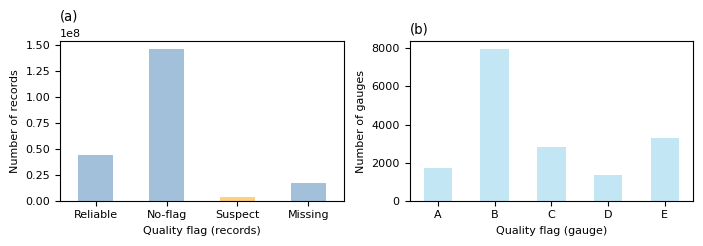

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Assuming you have a DataFrame called 'catchment_data' containing the classification results
# and another DataFrame called 'network_estreams' containing the count information

# Count the occurrences of each classification
classification_counts = network_estreams['quality_flag'].value_counts()

# Define the order of classifications for plotting
classification_order = ['A', 'B', 'C', 'D', 'E']

# Sum the counts of each category
count_sum = network_estreams[["num_reliable", "num_no_flags", "num_suspects", "num_missing"]].sum()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))


# Plot the sum of measurement counts in subplot 2
count_sum.plot(kind='bar', color=['steelblue', 'steelblue', 'orange', 'steelblue'], ax=axes[0], alpha=0.5)
axes[0].set_title('(a)', loc="left")
axes[0].set_xlabel('Quality flag (records)')
axes[0].set_ylabel('Number of records')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xticklabels(['Reliable', 'No-flag', 'Suspect', 'Missing'])

# Plot the classification counts in subplot 1
classification_counts.loc[classification_order].plot(kind='bar', color='skyblue', ax=axes[1], alpha=0.5)
axes[1].set_title('(b)', loc="left")
axes[1].set_xlabel('Quality flag (gauge)')
axes[1].set_ylabel('Number of gauges')
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()

#fig.savefig('results/figure_quality.png', dpi=300,  bbox_inches='tight')

# Show the plot
plt.show()




In [24]:
network_estreams[network_estreams.index.str.contains('ITLC') | network_estreams.index.str.contains('ITLW') | network_estreams.index.str.contains('PT')
                 | network_estreams.index.str.contains('FR')| network_estreams.index.str.contains('ITIS') | network_estreams.index.str.contains('IE')
                 | network_estreams.index.str.contains('ITLI')| network_estreams.index.str.contains('ITTO') | network_estreams.index.str.contains('DK')
                 | network_estreams.index.str.contains('SE')]


,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag
basin_id,,,,,,,,,,,,,,,,,,,,,
DK000001,32000001,HARALDSKÆR,DK,DK_ODA,VEJLE Å,9.438299,55.701426,9.438299,55.701426,198.92270,...,0.0,32663.0,0.0,5910.0,0.000000,0.846784,0.0,0.153216,0.846784,D
DK000002,32000002,REFSGÅRDSLUND,DK,DK_ODA,VEJLE Å,9.291508,55.649298,9.291508,55.649298,131.93290,...,0.0,10243.0,0.0,6924.0,0.000000,0.596668,0.0,0.403332,0.596668,E
DK000003,32000004,GREJSDALENS PLANTESKOLE,DK,DK_ODA,GREJS Å,9.522822,55.757453,9.522822,55.757453,63.40818,...,0.0,14108.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A
DK000004,32000005,STOKBRO OS TILLØB,DK,DK_ODA,HØJEN Å,9.522963,55.677436,9.522963,55.677436,15.11000,...,0.0,1461.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A
DK000005,32000013,AFLØB ENGELSHOLM SØ,DK,DK_ODA,VEJLE Å,9.306160,55.716518,9.306160,55.716518,15.67231,...,0.0,12418.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000286,751,VASSBOTTEN,SE,SE_SMHI,ENNINGDALSÄLVEN,11.536800,58.877100,11.536800,58.877100,624.10000,...,448.0,39464.0,0.0,0.0,0.011225,0.988775,0.0,0.000000,0.988775,A
SE000287,855,GETEBRO,SE,SE_SMHI,ALSTERÅN,16.163900,56.999600,16.163900,56.999600,1332.70000,...,3011.0,34710.0,0.0,0.0,0.079823,0.920177,0.0,0.000000,0.920177,C
SE000288,887,SOLVEDEN,SE,SE_SMHI,SÄVEÅN,12.442300,57.875400,12.442300,57.875400,1109.00000,...,2234.0,22224.0,0.0,20567.0,0.049617,0.493592,0.0,0.456791,0.493592,E


In [25]:
# Number of gauges with flags:

7430/17130

0.43374197314652657

In [15]:
(7963+1715)/17130

0.5649737302977232

In [16]:
network_estreams.columns

Index(['gauge_id', 'gauge_name', 'gauge_country', 'gauge_provider', 'river',
       'lon_snap', 'lat_snap', 'lon', 'lat', 'area', 'elevation', 'area_calc',
       'area_flag', 'area_perc', 'start_date', 'end_date', 'num_years',
       'num_months', 'num_days', 'num_days_gaps', 'num_continuous_days',
       'geometry', 'duplicated_suspect', 'watershed_group', 'gauges_upstream',
       'gauge_downstream', 'nested_catchments', 'num_suspects', 'num_reliable',
       'num_no_flags', 'num_missing', 'frac_suspects', 'frac_reliable',
       'frac_no_flag', 'frac_missing', 'sum_reliables_noflags',
       'quality_flag'],
      dtype='object')

In [18]:
network_estreams_v02[['num_days_reliable', 'num_days_noflag', 
                      'num_days_suspect', "gauge_flag"]] = network_estreams[["num_reliable", "num_no_flags",
                                                                        "num_suspects", "quality_flag"]]

In [19]:
try:
    network_estreams_v02.drop("gauge_downstream", axis=1, inplace=True)
except:
    pass

In [20]:
network_estreams_v02.columns

Index(['gauge_id', 'gauge_name', 'gauge_country', 'gauge_provider', 'river',
       'lon_snap', 'lat_snap', 'lon', 'lat', 'area', 'elevation', 'area_calc',
       'area_flag', 'area_perc', 'start_date', 'end_date', 'num_years',
       'num_months', 'num_days', 'num_days_gaps', 'num_continuous_days',
       'geometry', 'duplicated_suspect', 'watershed_group', 'gauges_upstream',
       'nested_catchments', 'num_days_reliable', 'num_days_noflag',
       'num_days_suspect', 'gauge_flag'],
      dtype='object')

In [21]:
network_estreams_v02 = network_estreams_v02[['gauge_id', 'gauge_name', 'gauge_country', 'gauge_provider', 'river',
       'lon_snap', 'lat_snap', 'lon', 'lat', 'elevation', 'area', 'area_calc',
       'area_flag', 'area_perc', 'start_date', 'end_date', 'num_years',
       'num_months', 'num_days', 'num_continuous_days', 'num_days_gaps', 
       'num_days_reliable', 'num_days_noflag', 'num_days_suspect', 
       'gauge_flag', 'duplicated_suspect', 'watershed_group', 'gauges_upstream',
       'nested_catchments']]

In [22]:
network_estreams_v02

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


In [23]:
network_estreams_v02.to_csv('results/estreams_gauging_stations_v03.csv',  encoding='utf-8')

# End